## ALY6140 Capstone - Analysis on Washington State Home Loan Data

### Overview
Each year thousands of banks and other financial institutions report data about mortgages to the public as part of the Home Mortgage Disclosure Act (HMDA). This data is important because:
- It helps show whether lenders are serving the housing needs of their communities;
- It gives public officials insight that helps them make informed decisions about policies; and
- It sheds light on lending patterns that could be discriminatory


### What is Census Tract?
- An area roughly equivalent to a neighborhood established by the Bureau of Census for analyzing populations.
- Primary purpose of census tracts: to provide a stable set of geographic units for the presentation of statistical data. 
- They generally encompass apopulation between 2,500 to 8,000 people, with an optimum size of 4,000 people.
- A census tract is smaller than a City but larger than a Block Group or Census Block.
- Most census tracts will be entirely within one city, but some cross over city limits and include rural land.

### What is MSAMD
- A code representing the Metropolitian Statistical Area/Metropolitian Division (MSA/MD) the property is located in. 
- An MSA is a region with relatively high population density at its core (usually a single large city) and close economic ties throughout. 
- Larger MSAs are divided into MDs.

In [2]:
#Useful imports
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
output_notebook()
%matplotlib inline

Loading BokehJS ...

In [3]:
#read the data
fulldata = pd.read_csv('Washington_State_HDMA-2016.csv')
fulldata.head()

C:\Users\wendy li\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (23,24,25,28,29,30,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,tract_to_msamd_income,rate_spread,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,state_name,...,applicant_sex_name,applicant_race_name_5,applicant_race_name_4,applicant_race_name_3,applicant_race_name_2,applicant_race_name_1,applicant_ethnicity_name,agency_name,agency_abbr,action_taken_name
0,121.690002,NaN,8381.0,23.790001,2175.0,2660.0,227,73300.0,116.0,Washington,...,Female,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...",Not Hispanic or Latino,Consumer Financial Protection Bureau,CFPB,Loan originated
1,83.370003,NaN,4915.0,23.990000,1268.0,1777.0,240,57900.0,42.0,Washington,...,Male,NaN,NaN,NaN,NaN,White,Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
2,91.129997,NaN,5075.0,11.820000,1136.0,1838.0,241,73300.0,117.0,Washington,...,Male,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
3,146.169998,NaN,5032.0,8.590000,1525.0,1820.0,351,73300.0,315.0,Washington,...,Male,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",National Credit Union Administration,NCUA,Loan originated
4,162.470001,NaN,5183.0,10.500000,1705.0,2104.0,417,78100.0,114.0,Washington,...,Female,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino,Federal Deposit Insurance Corporation,FDIC,Loan originated


In [4]:
# Get summary statistics of the data
fulldata.info()
fulldata.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466566 entries, 0 to 466565
Data columns (total 47 columns):
tract_to_msamd_income             465951 non-null float64
rate_spread                       8638 non-null float64
population                        465956 non-null float64
minority_population               465956 non-null float64
number_of_owner_occupied_units    465944 non-null float64
number_of_1_to_4_family_units     465955 non-null float64
loan_amount_000s                  466566 non-null int64
hud_median_family_income          465960 non-null float64
applicant_income_000s             404533 non-null float64
state_name                        466566 non-null object
state_abbr                        466566 non-null object
sequence_number                   466566 non-null int64
respondent_id                     466566 non-null object
purchaser_type_name               466566 non-null object
property_type_name                466566 non-null object
preapproval_name              

,tract_to_msamd_income,rate_spread,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,sequence_number,census_tract_number,as_of_year,application_date_indicator
count,465951.000000,8638.000000,465956.000000,465956.000000,465944.00000,465955.000000,466566.000000,465960.000000,404533.000000,4.665660e+05,465960.000000,466566.0,466566.000000
mean,106.906157,2.120028,5288.219117,24.765475,1389.05978,1822.137288,298.260936,76797.148468,112.984713,1.126340e+05,1395.489104,2016.0,0.207285
std,29.280418,1.113000,1665.350069,15.214602,506.75606,682.031693,760.741532,12959.051933,125.115972,2.020830e+05,2950.970895,0.0,0.609593
min,14.050000,1.500000,5.000000,2.040000,10.00000,10.000000,1.000000,48700.000000,1.000000,1.000000e+00,1.000000,2016.0,0.000000
25%,87.260002,1.590000,4124.000000,13.220000,1032.00000,1395.000000,172.000000,65800.000000,60.000000,5.121000e+03,117.010000,2016.0,0.000000
50%,104.529999,1.720000,5173.000000,20.750000,1359.00000,1734.000000,248.000000,73300.000000,89.000000,2.647200e+04,323.220000,2016.0,0.000000
75%,123.809998,2.000000,6342.000000,32.220001,1705.00000,2171.000000,350.000000,90300.000000,133.000000,1.095258e+05,702.030000,2016.0,0.000000
max,257.140015,13.660000,13025.000000,94.790001,2997.00000,5893.000000,99999.000000,90300.000000,9999.000000,1.241780e+06,9901.000000,2016.0,2.000000


In [5]:
#check if any missing values
fulldata.isnull().sum()

tract_to_msamd_income                615
rate_spread                       457928
population                           610
minority_population                  610
number_of_owner_occupied_units       622
number_of_1_to_4_family_units        611
loan_amount_000s                       0
hud_median_family_income             606
applicant_income_000s              62033
state_name                             0
state_abbr                             0
sequence_number                        0
respondent_id                          0
purchaser_type_name                    0
property_type_name                     0
preapproval_name                       0
owner_occupancy_name                   0
msamd_name                         38274
loan_type_name                         0
loan_purpose_name                      0
lien_status_name                       0
hoepa_status_name                      0
edit_status_name                  392061
denial_reason_name_3              465320
denial_reason_na

In [6]:
# Remove those columns with very high # of NAs
idx = np.r_[1,17,22:26,28:32,38:42]
print(idx)

[ 1 17 22 23 24 25 28 29 30 31 38 39 40 41]


In [7]:
newdata = fulldata.drop(fulldata.columns[idx], axis=1)

In [8]:
#check missing values again
newdata.isnull().sum()

tract_to_msamd_income               615
population                          610
minority_population                 610
number_of_owner_occupied_units      622
number_of_1_to_4_family_units       611
loan_amount_000s                      0
hud_median_family_income            606
applicant_income_000s             62033
state_name                            0
state_abbr                            0
sequence_number                       0
respondent_id                         0
purchaser_type_name                   0
property_type_name                    0
preapproval_name                      0
owner_occupancy_name                  0
loan_type_name                        0
loan_purpose_name                     0
lien_status_name                      0
hoepa_status_name                     0
county_name                         367
co_applicant_sex_name                 0
co_applicant_race_name_1              0
co_applicant_ethnicity_name           0
census_tract_number                 606


In [9]:
#remove rows with NA values except column applicant_income
newdata = newdata.dropna(subset=['tract_to_msamd_income','number_of_owner_occupied_units'], how='any')
newdata.isnull().sum()

tract_to_msamd_income                 0
population                            0
minority_population                   0
number_of_owner_occupied_units        0
number_of_1_to_4_family_units         0
loan_amount_000s                      0
hud_median_family_income              0
applicant_income_000s             61946
state_name                            0
state_abbr                            0
sequence_number                       0
respondent_id                         0
purchaser_type_name                   0
property_type_name                    0
preapproval_name                      0
owner_occupancy_name                  0
loan_type_name                        0
loan_purpose_name                     0
lien_status_name                      0
hoepa_status_name                     0
county_name                           0
co_applicant_sex_name                 0
co_applicant_race_name_1              0
co_applicant_ethnicity_name           0
census_tract_number                   0


In [10]:
# fill NAs in column applicant_income with column mean
newdata.applicant_income_000s = newdata.applicant_income_000s.fillna(newdata.applicant_income_000s.mean())

In [11]:
newdata.isnull().sum()

tract_to_msamd_income             0
population                        0
minority_population               0
number_of_owner_occupied_units    0
number_of_1_to_4_family_units     0
loan_amount_000s                  0
hud_median_family_income          0
applicant_income_000s             0
state_name                        0
state_abbr                        0
sequence_number                   0
respondent_id                     0
purchaser_type_name               0
property_type_name                0
preapproval_name                  0
owner_occupancy_name              0
loan_type_name                    0
loan_purpose_name                 0
lien_status_name                  0
hoepa_status_name                 0
county_name                       0
co_applicant_sex_name             0
co_applicant_race_name_1          0
co_applicant_ethnicity_name       0
census_tract_number               0
as_of_year                        0
application_date_indicator        0
applicant_sex_name          

C:\Users\wendy li\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


count    465940.000000
mean       5288.318962
std        1665.267437
min          98.000000
25%        4124.000000
50%        5173.000000
75%        6342.000000
max       13025.000000
Name: population, dtype: float64
count    465940.000000
mean         24.764972
std          15.214524
min           2.040000
25%          13.220000
50%          20.750000
75%          32.220001
max          94.790001
Name: minority_population, dtype: float64


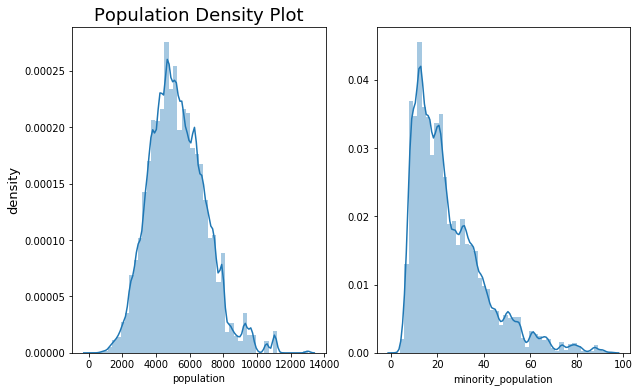

In [12]:
# Visualize population/Minority population distribution
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.distplot(newdata['population'])
plt.title('Population Density Plot', fontsize=18)
plt.ylabel('density', fontsize=13);

plt.subplot(1,2,2)
sns.distplot(newdata['minority_population'])

#statistical information 
print(newdata['population'].describe())
print(newdata['minority_population'].describe())

### Analyse Loan Count by different factors

In [23]:
# Group by loan purpose and plot Loan purpose by count
by_purp = newdata.groupby('loan_purpose_name').size().reset_index(name='count')
by_purp

,loan_purpose_name,count
0,Home improvement,23817
1,Home purchase,192252
2,Refinancing,249871


Text(0.5, 1.0, 'Loan Purpose by Count')

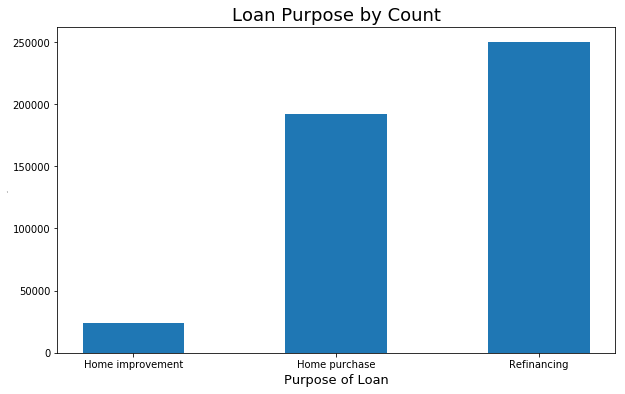

In [73]:
plt.figure(figsize=(10,6))
plt.bar(by_purp['loan_purpose_name'], by_purp['count'], width =0.5)
plt.xlabel('Purpose of Loan', fontsize=13)
plt.ylabel('Count', fontsize=1)
plt.title('Loan Purpose by Count', fontsize = 18)

Observations: There are most cases for Refinancing, followed by Home purchase and Home improvement.

Text(0.5, 1.0, 'Loan Count by Gender')

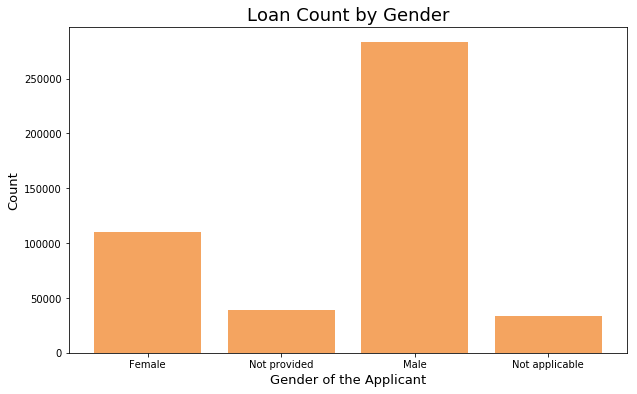

In [86]:
# Group by gender and plot
by_gender = newdata.groupby('applicant_sex_name').size().reset_index(name='count')
plt.figure(figsize=(10,6))
plt.bar(by_gender['applicant_sex_name'], by_gender['count'], color='sandybrown')
plt.gca().set_xticklabels(['Female','Not provided','Male','Not applicable'])
plt.xlabel('Gender of the Applicant', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.title('Loan Count by Gender', fontsize = 18)

Observations: Male applicant has the highest number of loan application.

In [104]:
# Group data by loan purpose and gender, sort according to the count
by_purp_gender = pd.DataFrame(newdata.groupby(['loan_purpose_name','applicant_sex_name']).size().reset_index(name='count').sort_values(['loan_purpose_name','count'], ascending=False))

# reset row index after sorting
by_purp_gender.reset_index(drop=True, inplace=True)
by_purp_gender

,loan_purpose_name,applicant_sex_name,count
0,Refinancing,Male,155077
1,Refinancing,Female,57816
2,Refinancing,"Information not provided by applicant in mail,...",22389
3,Refinancing,Not applicable,14589
4,Home purchase,Male,113931
5,Home purchase,Female,45299
6,Home purchase,Not applicable,18416
7,Home purchase,"Information not provided by applicant in mail,...",14606
8,Home improvement,Male,14110
9,Home improvement,Female,6893


C:\Users\wendy li\Anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
C:\Users\wendy li\Anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support 'p' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
C:\Users\wendy li\Anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support 'p' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
C:\Users\wendy li\Anac

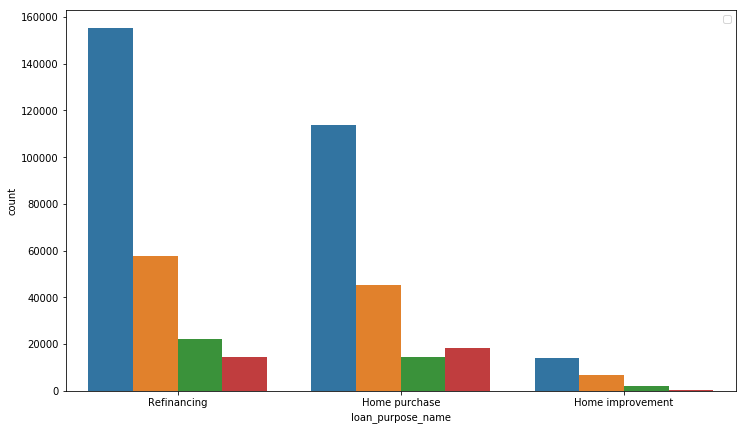

In [351]:
#Barplot of loan purpose split by gender
plt.figure(figsize=(12,7))
sns.barplot(x='loan_purpose_name',y='count', data=by_purp_gender, hue='applicant_sex_name')
plt.legend(handles=,labels=('Male','Female','No Information','Not Appliicable'))

Observations: For various loan purpose, male applicants have the highest number of loan applications.

In [84]:
#group by applicant race
by_race = newdata.groupby('applicant_race_name_1').size().reset_index(name='count').sort_values('count', ascending=False)
by_race.reset_index(drop=True, inplace=True)
by_race

,applicant_race_name_1,count
0,White,314419
1,"Information not provided by applicant in mail,...",62184
2,Asian,36793
3,Not applicable,33498
4,Black or African American,10861
5,American Indian or Alaska Native,4487
6,Native Hawaiian or Other Pacific Islander,3698


[Text(0, 0, 'White'),
 Text(0, 0, 'No Information'),
 Text(0, 0, 'Asian'),
 Text(0, 0, 'Not applicable'),
 Text(0, 0, 'Black/African American'),
 Text(0, 0, 'Asian'),
 Text(0, 0, 'American Indian/Alaska Native')]

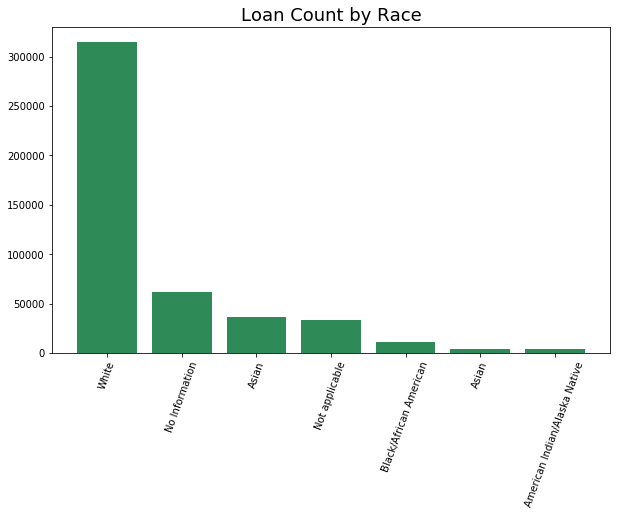

In [356]:
# plot graph by race
plt.figure(figsize=(10,6))
plt.bar(by_race['applicant_race_name_1'],by_race['count'], color='seagreen')
plt.title('Loan Count by Race', fontsize = 18)
plt.gca().set_xticklabels(['White','No Information','Asian','Not applicable','Black/African American','Asian','American Indian/Alaska Native','Native Hawaiian/Pacific Islander'],rotation=70)

Observations: White has the most number of loan applications.

In [90]:
#group by applicant ethinity
by_ethnicity = newdata.groupby('applicant_ethnicity_name').size().reset_index(name='count').sort_values('count', ascending=False)
by_ethnicity.reset_index(drop=True, inplace=True)
by_ethnicity

,applicant_ethnicity_name,count
0,Not Hispanic or Latino,349769
1,"Information not provided by applicant in mail,...",60039
2,Not applicable,33607
3,Hispanic or Latino,22525


[Text(0, 0, 'Not Hispanice or Latino'),
 Text(0, 0, 'Not provided'),
 Text(0, 0, 'Not applicable'),
 Text(0, 0, 'Hispanic or Latino')]

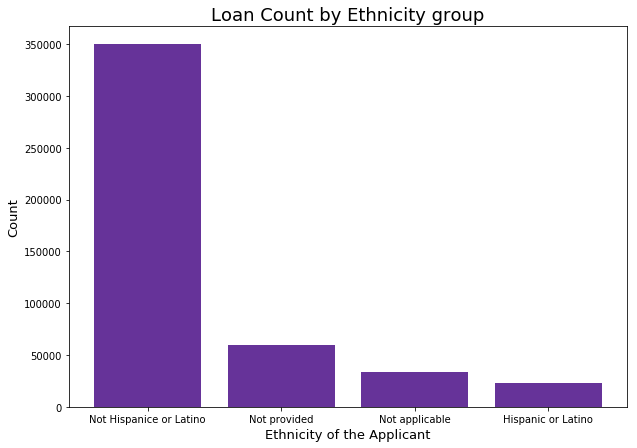

In [97]:
# plot count graph by ethinity
plt.figure(figsize=(10,7))
plt.bar(by_ethnicity['applicant_ethnicity_name'],by_ethnicity['count'],color='rebeccapurple')
plt.xlabel('Ethnicity of the Applicant', fontsize = 13)
plt.ylabel('Count', fontsize=13)
plt.title('Loan Count by Ethnicity group', fontsize = 18)
plt.gca().set_xticklabels(['Not Hispanice or Latino','Not provided','Not applicable','Hispanic or Latino'])

In [126]:
# group by loan type name and race
by_race_type = newdata.groupby(['applicant_race_name_1','loan_type_name']).size().reset_index(name='count').sort_values(['applicant_race_name_1','count'],ascending=False)
by_race_type.reset_index(drop=True, inplace=True)
by_race_type

,applicant_race_name_1,loan_type_name,count
0,White,Conventional,225669
1,White,FHA-insured,43453
2,White,VA-guaranteed,42240
3,White,FSA/RHS-guaranteed,3057
4,Not applicable,Conventional,17379
5,Not applicable,FHA-insured,8833
6,Not applicable,VA-guaranteed,6297
7,Not applicable,FSA/RHS-guaranteed,989
8,Native Hawaiian or Other Pacific Islander,Conventional,2131
9,Native Hawaiian or Other Pacific Islander,VA-guaranteed,827


Text(0.5, 1.0, 'Loan Count by Race, split by Loan Type')

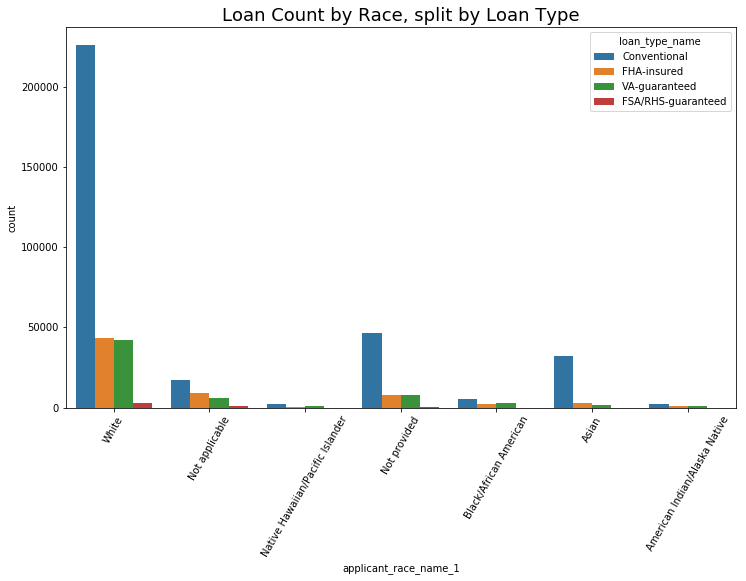

In [357]:
## plot by race, split by loan type
plt.figure(figsize=(12,7))
sns.barplot(x='applicant_race_name_1',y='count', data=by_race_type, hue='loan_type_name')
plt.gca().set_xticklabels(['White','Not applicable','Native Hawaiian/Pacific Islander','Not provided','Black/African American','Asian','American Indian/Alaska Native'],rotation=60)

plt.title('Loan Count by Race, split by Loan Type', fontsize=18)

Observations: For White and Asian they are more likely to choose conventional loan, while for Black they are more likely to choose a non-conventional type of loan. 

In [131]:
# group by loan type name and ethnicity
by_ethni_type = newdata.groupby(['applicant_ethnicity_name','loan_type_name']).size().reset_index(name='count').sort_values(['applicant_ethnicity_name','count'],ascending=False)
by_ethni_type.reset_index(drop=True, inplace=True)
by_ethni_type

,applicant_ethnicity_name,loan_type_name,count
0,Not applicable,Conventional,17437
1,Not applicable,FHA-insured,8845
2,Not applicable,VA-guaranteed,6336
3,Not applicable,FSA/RHS-guaranteed,989
4,Not Hispanic or Latino,Conventional,255155
5,Not Hispanic or Latino,VA-guaranteed,46203
6,Not Hispanic or Latino,FHA-insured,45556
7,Not Hispanic or Latino,FSA/RHS-guaranteed,2855
8,"Information not provided by applicant in mail,...",Conventional,45563
9,"Information not provided by applicant in mail,...",VA-guaranteed,7331


Text(0.5, 1.0, 'Loan Count by Ethinicity, split by Loan Type')

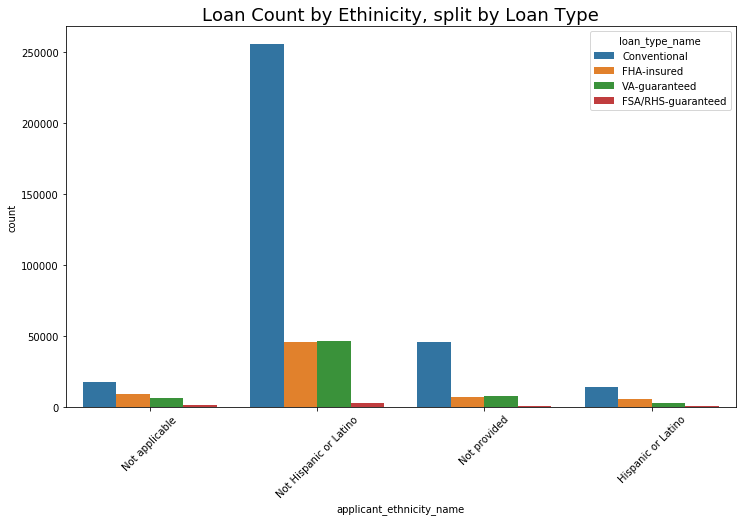

In [241]:
#Plot Loan Count by Ethinicity, split by Loan Type
plt.figure(figsize=(12,7))
sns.barplot(x='applicant_ethnicity_name',y='count', data=by_ethni_type, hue='loan_type_name')
plt.gca().set_xticklabels(['Not applicable','Not Hispanic or Latino','Not provided','Hispanic or Latino'],rotation=45)

plt.title('Loan Count by Ethinicity, split by Loan Type', fontsize=18)

Observations: Not Haspanic or Latino group is more likely to use conventional loan, while Hispanic or Latino has equal chance of using conventional or non-conventioanl loan.

In [253]:
# group by property type
by_prop = newdata.groupby('property_type_name', as_index=False).size().reset_index(name='count')
by_prop

,property_type_name,count
0,Manufactured housing,14424
1,Multifamily dwelling,1637
2,One-to-four family dwelling (other than manufa...,449879


Text(0.5, 1.0, 'Loan Count by Property Type')

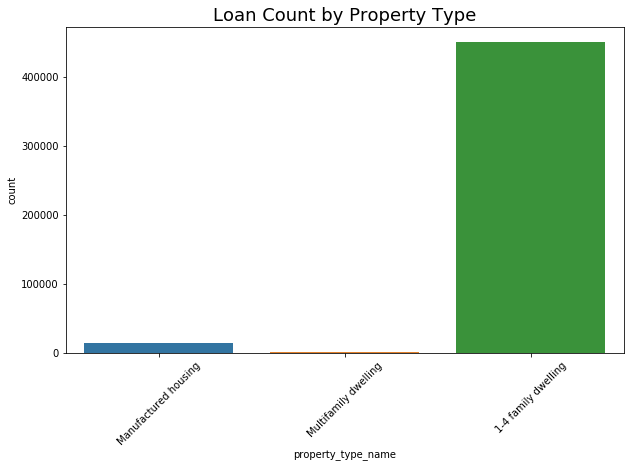

In [260]:
plt.figure(figsize=(10,6))
sns.barplot(x='property_type_name', y='count', data=by_prop)
plt.gca().set_xticklabels(['Manufactured housing','Multifamily dwelling','1-4 family dwelling'],rotation=45)

plt.title('Loan Count by Property Type', fontsize=18)

Text(0.5, 1.0, 'Loan Count by County')

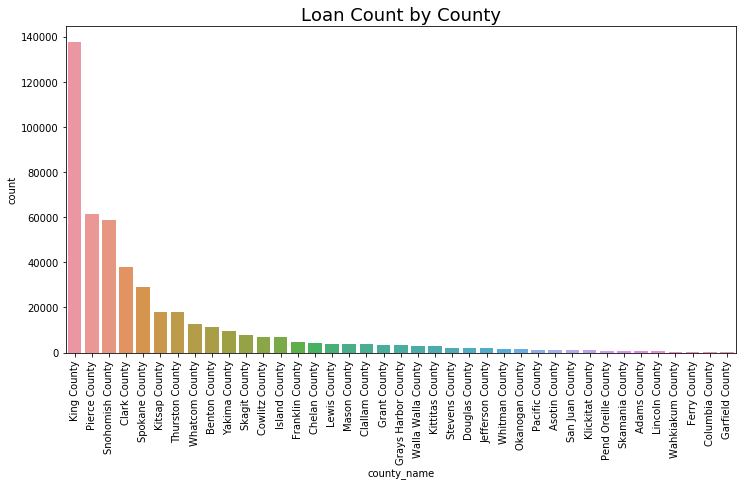

In [326]:
# Loan count by county
count_by_county = newdata.groupby('county_name').size().reset_index(name='count').sort_values('count',ascending=False)
plt.figure(figsize=(12,6))
sns.barplot('county_name','count',data=count_by_county)
plt.xticks(rotation=90)
plt.title('Loan Count by County', fontsize=18)

Text(0.5, 1.0, 'Population by County')

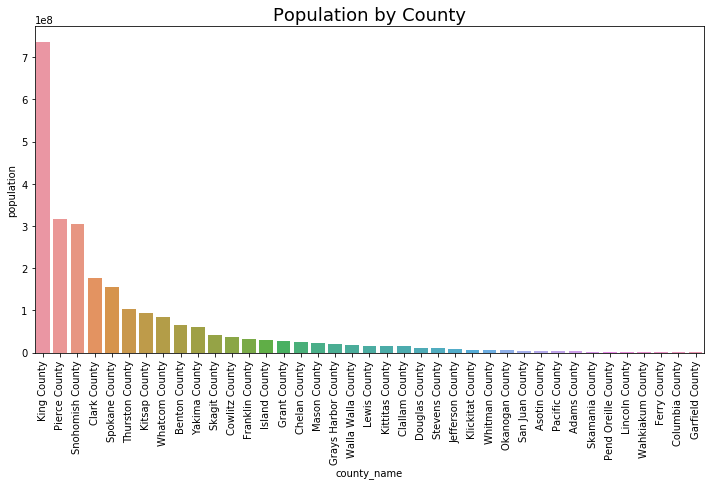

In [327]:
# population by county
count_by_county = newdata.groupby('county_name', as_index=False).agg({'population':'sum'}).sort_values('population',ascending=False)
plt.figure(figsize=(12,6))
sns.barplot('county_name','population',data=count_by_county)
plt.xticks(rotation=90)
plt.title('Population by County', fontsize=18)

## Analyse Loan Amount

In [245]:
# group by race, calculate total loan amount
loansum_byrace=newdata.groupby(['applicant_race_name_1'],as_index=False).agg({'loan_amount_000s':'sum'}).sort_values('loan_amount_000s',ascending=False)
loansum_byrace

,applicant_race_name_1,loan_amount_000s
6,White,86014216
3,"Information not provided by applicant in mail,...",18338648
5,Not applicable,16521766
1,Asian,13173311
2,Black or African American,2874350
0,American Indian or Alaska Native,1015238
4,Native Hawaiian or Other Pacific Islander,955558


Text(0.5, 1.0, 'Sum of Loan Amount by Race')

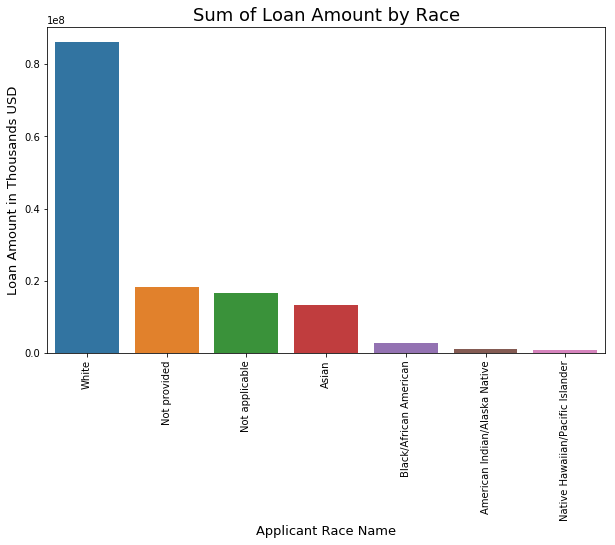

In [246]:
plt.figure(figsize=(10,6))
sns.barplot(x='applicant_race_name_1', y='loan_amount_000s', data=loansum_byrace)
plt.gca().set_xticklabels(['White','Not provided','Not applicable','Asian','Black/African American','American Indian/Alaska Native','Native Hawaiian/Pacific Islander'],rotation=90)

plt.xlabel('Applicant Race Name', fontsize=13)
plt.ylabel('Loan Amount in Thousands USD', fontsize=13)
plt.title('Sum of Loan Amount by Race', fontsize=18)

In [247]:
# group by race, calculate average loan amount
loan_byrace=newdata.groupby(['applicant_race_name_1'],as_index=False).agg({'loan_amount_000s':'mean'}).sort_values('loan_amount_000s',ascending=False)
loan_byrace

,applicant_race_name_1,loan_amount_000s
5,Not applicable,493.216491
1,Asian,358.038513
3,"Information not provided by applicant in mail,...",294.909430
6,White,273.565580
2,Black or African American,264.648743
4,Native Hawaiian or Other Pacific Islander,258.398594
0,American Indian or Alaska Native,226.262090


Text(0.5, 1.0, 'Average Loan Amount by Race')

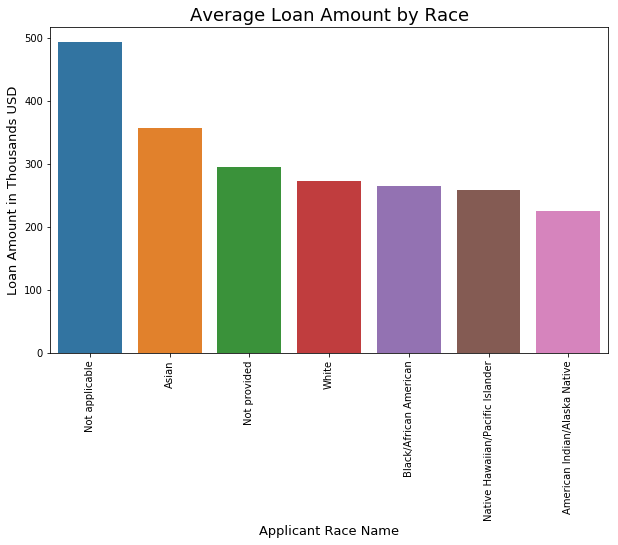

In [320]:
plt.figure(figsize=(10,6))
sns.barplot(x='applicant_race_name_1', y='loan_amount_000s', data=loan_byrace)
plt.gca().set_xticklabels(['Not applicable','Asian','Not provided','White','Black/African American','Native Hawaiian/Pacific Islander','American Indian/Alaska Native'],rotation=90)

plt.xlabel('Applicant Race Name', fontsize=13)
plt.ylabel('Loan Amount in Thousands USD', fontsize=13)
plt.title('Average Loan Amount by Race', fontsize=18)

In [230]:
# group by ethinicity group, calculate average loan amount
loan_byethni=newdata.groupby(['applicant_ethnicity_name'],as_index=False).agg({'loan_amount_000s':'mean'}).sort_values('loan_amount_000s',ascending=False)
loan_byethni

,applicant_ethnicity_name,loan_amount_000s
3,Not applicable,492.424227
1,"Information not provided by applicant in mail,...",295.197272
2,Not Hispanic or Latino,284.501714
0,Hispanic or Latino,226.901532


Text(0.5, 1.0, 'Average Loan Amount by Race')

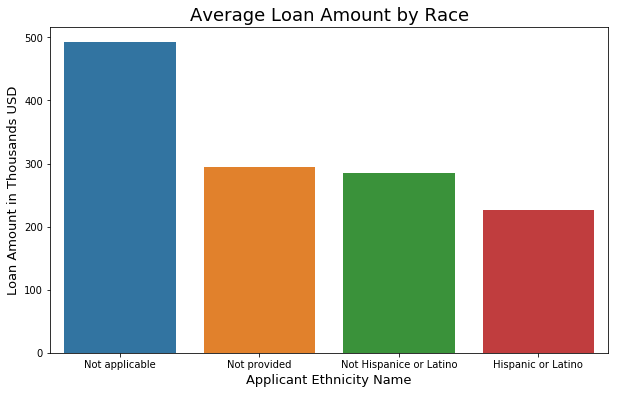

In [296]:
plt.figure(figsize=(10,6))
sns.barplot(x='applicant_ethnicity_name', y='loan_amount_000s', data=loan_byethni)
plt.gca().set_xticklabels(['Not applicable','Not provided','Not Hispanice or Latino','Hispanic or Latino'])

plt.xlabel('Applicant Ethnicity Name', fontsize=13)
plt.ylabel('Loan Amount in Thousands USD', fontsize=13)
plt.title('Average Loan Amount by Race', fontsize=18)

In [297]:
# Group by county and calculate average of applicant income and loan_amount
by_county = newdata.groupby('county_name').agg({'applicant_income_000s':'mean','loan_amount_000s':'mean'})
by_county

,applicant_income_000s,loan_amount_000s
county_name,,
Adams County,70.414607,136.602941
Asotin County,81.432505,185.518964
Benton County,93.633748,199.887695
Chelan County,118.674330,253.574397
Clallam County,86.284793,199.846323
Clark County,100.915330,250.989398
Columbia County,95.173049,164.578571
Cowlitz County,86.082702,188.925216
Douglas County,96.571617,220.819465


Text(0.5, 1.0, 'Average Applicant Income/Loan Amount by county')

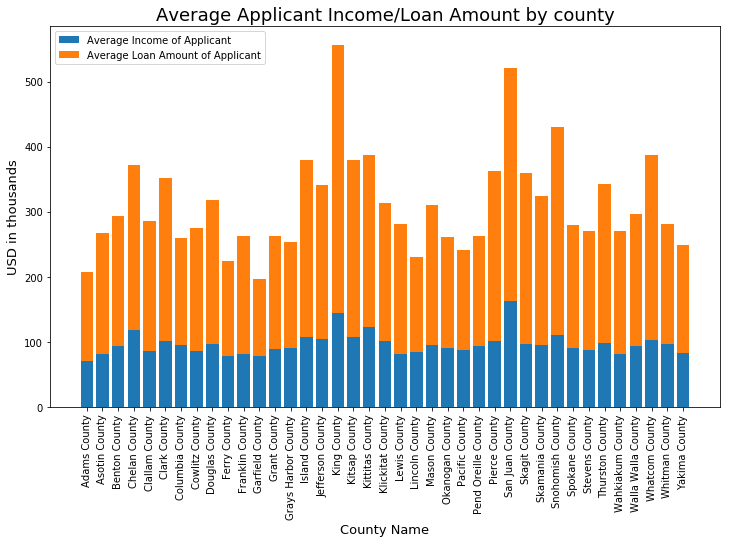

In [358]:
#Barplot of average income and average loan amount by county
plt.figure(figsize=(12,7))
plt.bar(by_county.index, by_county['applicant_income_000s'])
plt.bar(by_county.index, by_county['loan_amount_000s'], bottom=by_county['applicant_income_000s'])
plt.legend(['Average Income of Applicant','Average Loan Amount of Applicant'], loc='upper left')
plt.xticks(rotation=90)

plt.xlabel('County Name', fontsize=13)
plt.ylabel('USD in thousands', fontsize=13)
plt.title('Average Applicant Income/Loan Amount by county', fontsize=18)

In [262]:
# groupby county, split by property type
by_county_prop = newdata.groupby(['county_name','property_type_name'],as_index=False).agg({'loan_amount_000s':'mean'})
by_county_prop

,county_name,property_type_name,loan_amount_000s
0,Adams County,Manufactured housing,120.377778
1,Adams County,One-to-four family dwelling (other than manufa...,137.890653
2,Asotin County,Manufactured housing,142.200000
3,Asotin County,Multifamily dwelling,1145.000000
4,Asotin County,One-to-four family dwelling (other than manufa...,187.347783
5,Benton County,Manufactured housing,135.046233
6,Benton County,Multifamily dwelling,5225.526316
7,Benton County,One-to-four family dwelling (other than manufa...,194.576143
8,Chelan County,Manufactured housing,147.758755
9,Chelan County,Multifamily dwelling,3015.538462


Text(0.5, 1.0, 'Average Loan Amount by County')

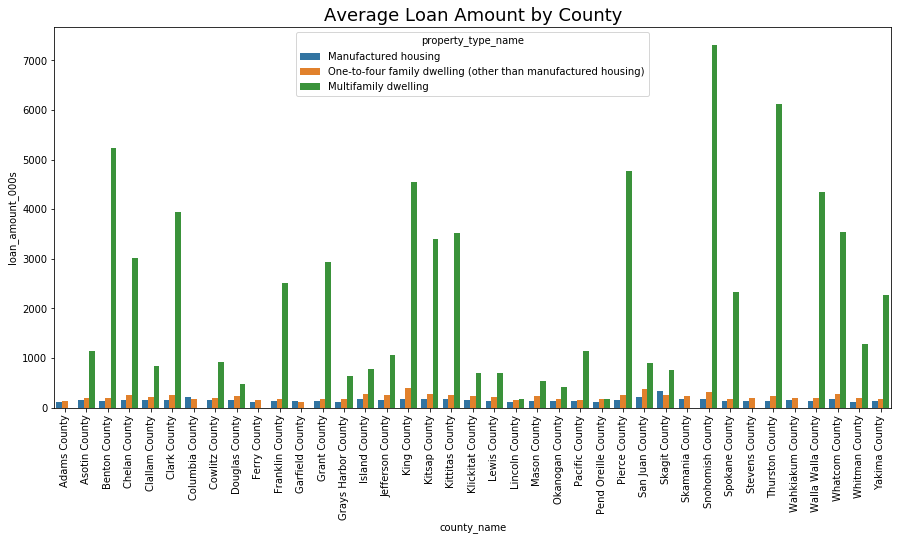

In [271]:
plt.figure(figsize=(15,7))
sns.barplot(x='county_name',y='loan_amount_000s',data=by_county_prop,hue='property_type_name')
plt.xticks(rotation=90)
plt.title('Average Loan Amount by County', fontsize=18)

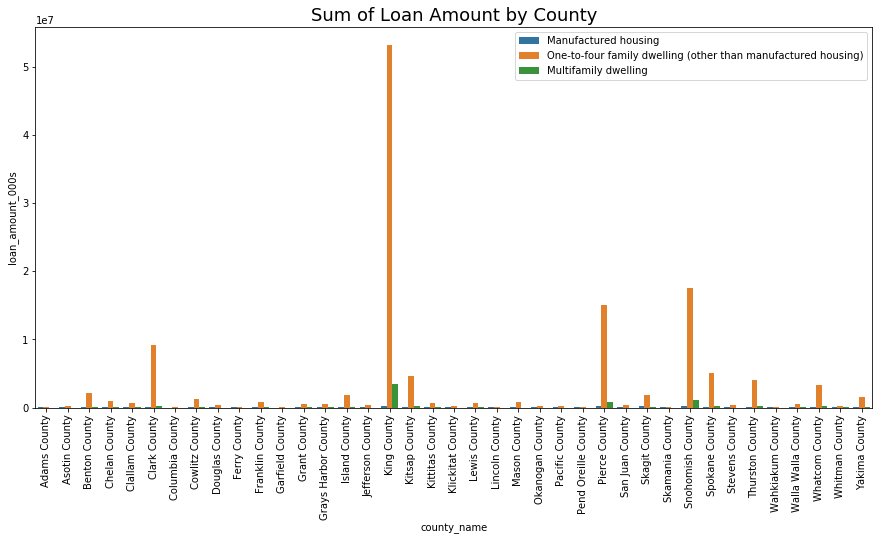

In [278]:
# groupby county, split by property type
by_county_prop = newdata.groupby(['county_name','property_type_name'],as_index=False).agg({'loan_amount_000s':'sum'})
plt.figure(figsize=(15,7))
sns.barplot(x='county_name',y='loan_amount_000s',data=by_county_prop,hue='property_type_name')
plt.xticks(rotation=90)
plt.title('Sum of Loan Amount by County', fontsize=18)
plt.legend(loc='upper right')

## What is MSAMD
A code representing the Metropolitian Statistical Area/Metropolitian Division (MSA/MD) the property is located in. An MSA is a region with relatively high population density at its core (usually a single large city) and close economic ties throughout. Larger MSAs are divided into MDs.

In [303]:
# median income and average loan amount in different MSAMD
by_msamd = fulldata.groupby('msamd_name').agg({'hud_median_family_income':'mean','loan_amount_000s':'mean'})
by_msamd


,hud_median_family_income,loan_amount_000s
msamd_name,,
Bellingham - WA,69900.0,284.133502
"Bremerton, Silverdale - WA",78100.0,273.155571
"Kennewick, Richland - WA",65800.0,194.541852
"Lewiston - ID, WA",59400.0,185.465374
Longview - WA,61300.0,188.925216
"Mount Vernon, Anacortes - WA",61400.0,261.762169
"Olympia, Tumwater - WA",73600.0,244.012064
"Portland, Vancouver, Hillsboro - OR, WA",73300.0,250.567817
"Seattle, Bellevue, Everett - WA",90300.0,385.317260


Text(0.5, 1.0, 'Average Loan Amount by MSAMD')

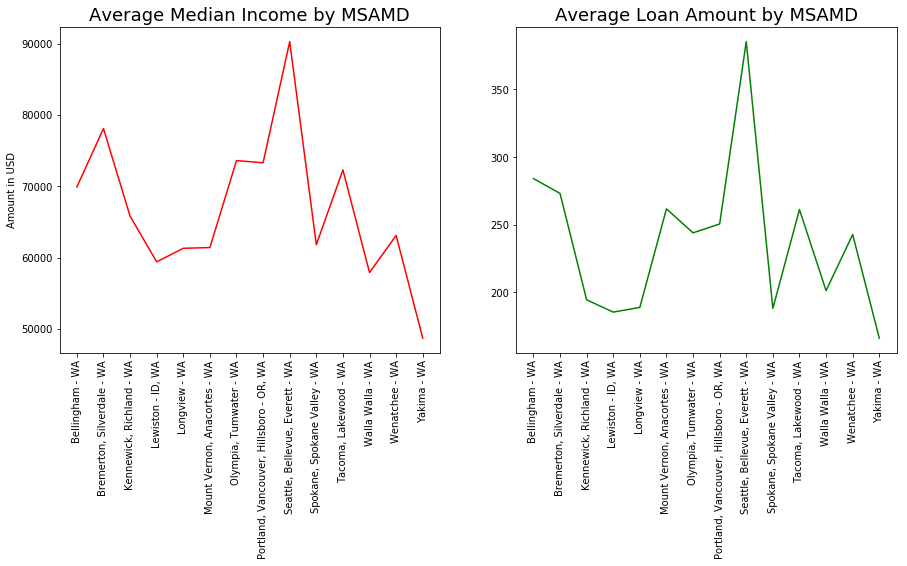

In [318]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(by_msamd.index,by_msamd['hud_median_family_income'], 'r')
plt.xticks(rotation=90)
plt.title('Average Median Income by MSAMD', fontsize=18)
plt.ylabel('Amount in USD')

plt.subplot(1,2,2)
plt.plot(by_msamd.index,by_msamd['loan_amount_000s'], 'g')
plt.xticks(rotation=90)
plt.title('Average Loan Amount by MSAMD', fontsize=18)

Observations: Average loan amount follows the similar shape of average median income.

## Correlation Analysis

In [71]:
subdata = newdata.iloc[:,0:8]
subdata.head()

,tract_to_msamd_income,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s
0,121.690002,8381.0,23.790001,2175.0,2660.0,227,73300.0,116.0
1,83.370003,4915.0,23.990000,1268.0,1777.0,240,57900.0,42.0
2,91.129997,5075.0,11.820000,1136.0,1838.0,241,73300.0,117.0
3,146.169998,5032.0,8.590000,1525.0,1820.0,351,73300.0,315.0
4,162.470001,5183.0,10.500000,1705.0,2104.0,417,78100.0,114.0


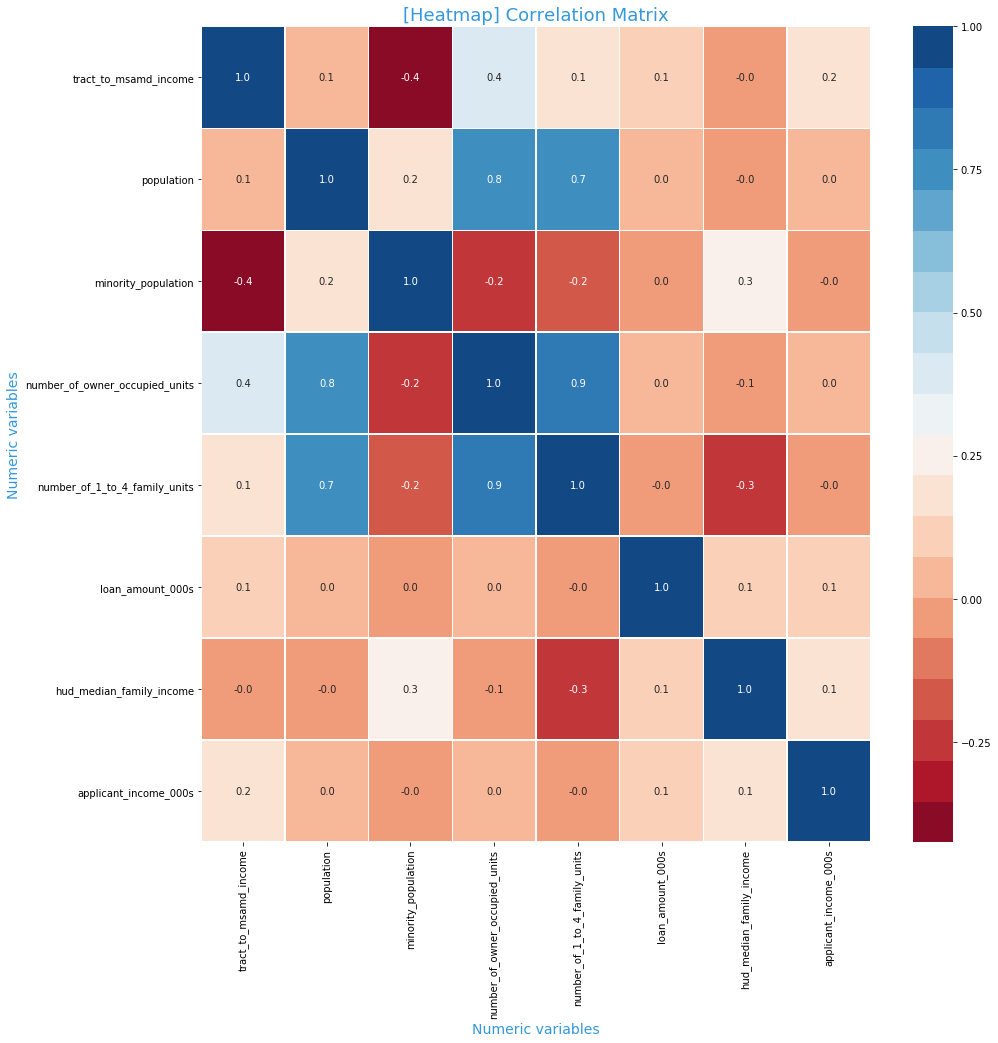

In [72]:
# plot Heatmap of Correlation matrix
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(subdata.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap=sns.color_palette("RdBu", 20))

ax.set_xlabel('Numeric variables', size=14, color="#3498DB")
ax.set_ylabel('Numeric variables', size=14, color="#3498DB")
ax.set_title('[Heatmap] Correlation Matrix', size=18, color="#3498DB")

plt.show()

### Correlation Coefficient:
- 0-0.19 is regarded as very weak
- 0.2-0.39 as weak
- 0.40-0.59 as moderate
- 0.6-0.79 as strong
- 0.8-1 as very strong correlation

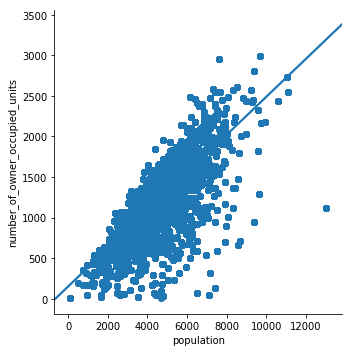

In [288]:
sns.lmplot(x='population',y='number_of_owner_occupied_units',data=subdata)

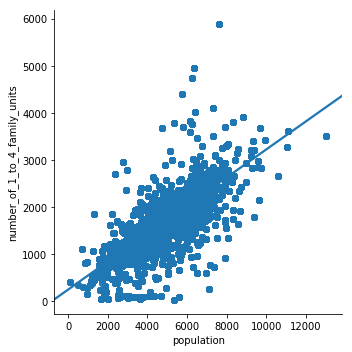

In [289]:
sns.lmplot(x='population',y='number_of_1_to_4_family_units',data=subdata)

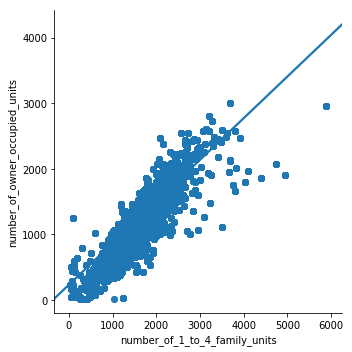

In [290]:
sns.lmplot(x='number_of_1_to_4_family_units',y='number_of_owner_occupied_units',data=subdata)

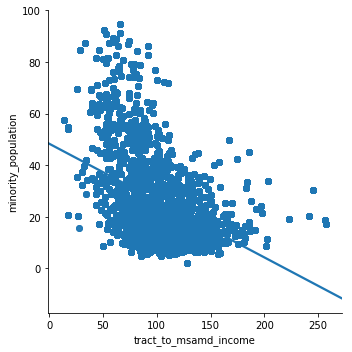

In [292]:
sns.lmplot(x='tract_to_msamd_income',y='minority_population',data=subdata)

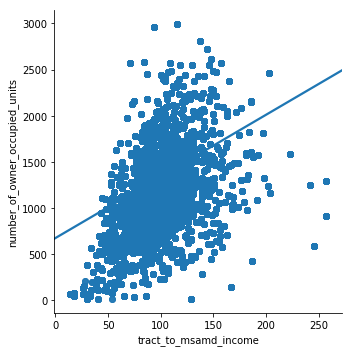

In [293]:
sns.lmplot(x='tract_to_msamd_income',y='number_of_owner_occupied_units',data=subdata)

### Chi-squared Test of Independence

#### 1.Test the hypothesis whether the action taken is independent of the gender at 0.05 significance level.

In [19]:
# Chi^2 test of independence for Gender and Action Taken
tab1 = pd.crosstab(newdata['action_taken_name'], newdata['applicant_sex_name'])
stats.chi2_contingency(tab1)

(243628.4000135199,
 0.0,
 21,
 array([[2.76377570e+03, 9.86746912e+02, 7.11288859e+03, 8.42588805e+02],
        [1.51110487e+04, 5.39507625e+03, 3.88899887e+04, 4.60688632e+03],
        [1.41933316e+04, 5.06742502e+03, 3.65281403e+04, 4.32710308e+03],
        [4.27787902e+03, 1.52732507e+03, 1.10096043e+04, 1.30419157e+03],
        [6.22472833e+04, 2.22240592e+04, 1.60200407e+05, 1.89772506e+04],
        [1.14116124e+04, 4.07427176e+03, 2.93690720e+04, 3.47904385e+03],
        [2.36099069e+00, 8.42941151e-01, 6.07627592e+00, 7.19792248e-01],
        [7.08297206e-01, 2.52882345e-01, 1.82288277e+00, 2.15937674e-01]]))

Conclusion: P-value < 0.05, hence we reject the null hyppthesisi and cconclude there is some association or relationship between action taken and gender.

#### 2.Test the hypothesis whether the action taken is independent of the ethnicity at 0.05 significance level.

In [22]:
# Chi^2 test of independence for Action Taken and ethnicity
tab2 = pd.crosstab(newdata['action_taken_name'], newdata['applicant_ethnicity_name'])
stats.chi2_contingency(tab2)

(243452.8900796481,
 0.0,
 21,
 array([[5.65904730e+02, 1.50838420e+03, 8.78738875e+03, 8.44322320e+02],
        [3.09410563e+03, 8.24714795e+03, 4.80453820e+04, 4.61636438e+03],
        [2.90619586e+03, 7.74628605e+03, 4.51275126e+04, 4.33600552e+03],
        [8.75929251e+02, 2.33473546e+03, 1.36014605e+04, 1.30687478e+03],
        [1.27456190e+04, 3.39726624e+04, 1.97914425e+05, 1.90162938e+04],
        [2.33661705e+03, 6.22810883e+03, 3.62830726e+04, 3.48620152e+03],
        [4.83431343e-01, 1.28855647e+00, 7.50673907e+00, 7.21273125e-01],
        [1.45029403e-01, 3.86566940e-01, 2.25202172e+00, 2.16381938e-01]]))

Conclusion: P-value < 0.05, hence we reject the null hyppthesisi and cconclude there is some association or relationship between action taken and ethnicity.

#### 3.Test the hypothesis whether the action taken is independent of the race at 0.05 significance level.

In [23]:
# Chi^2 test of independence for Action Taken and race
tab3 = pd.crosstab(newdata['action_taken_name'], newdata['applicant_race_name_1'])
stats.chi2_contingency(tab3)

(245007.31942105026,
 0.0,
 42,
 array([[1.12728725e+02, 9.24365493e+02, 2.72865317e+02, 1.56227391e+03,
         9.29063570e+01, 8.41583869e+02, 7.89927633e+03],
        [6.16348588e+02, 5.05400347e+03, 1.49190150e+03, 8.54179197e+03,
         5.07969039e+02, 4.60139180e+03, 4.31895936e+04],
        [5.78916796e+02, 4.74706612e+03, 1.40129604e+03, 8.02303589e+03,
         4.77119303e+02, 4.32194224e+03, 4.05666236e+04],
        [1.74485884e+02, 1.43076870e+03, 4.22351502e+02, 2.41814804e+03,
         1.43804056e+02, 1.30263609e+03, 1.22268057e+04],
        [2.53893863e+03, 2.08190704e+04, 6.14562345e+03, 3.51863961e+04,
         2.09248831e+03, 1.89546169e+04, 1.77911866e+05],
        [4.65456192e+02, 3.81669928e+03, 1.12665917e+03, 6.45061908e+03,
         3.83609761e+02, 3.47489448e+03, 3.26160620e+04],
        [9.62999528e-02, 7.89651028e-01, 2.33098682e-01, 1.33459244e+00,
         7.93664420e-02, 7.18933768e-01, 6.74805769e+00],
        [2.88899858e-02, 2.36895308e-01, 6.99296047

Conclusion: P-value < 0.05, hence we reject the null hyppthesisi and cconclude there is some association or relationship between action taken and race.